<a href="https://colab.research.google.com/github/aryanxyadav/IEEE/blob/main/forecasting_review_ieee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


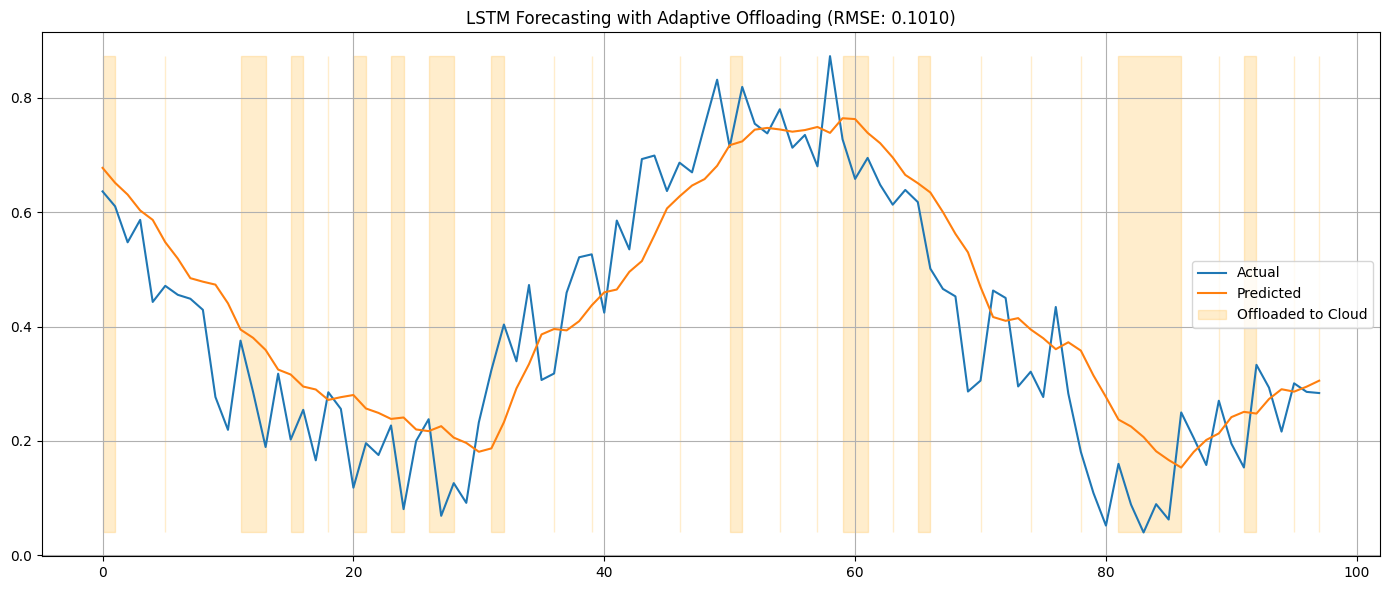

In [ ]:
# LSTM + Adaptive Computation Offloading Simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import random

# 1. Generate synthetic IoT energy consumption data
np.random.seed(42)
timesteps = 500
base_consumption = np.sin(np.linspace(0, 50, timesteps)) + np.random.normal(0, 0.2, timesteps)
temperature = np.linspace(20, 35, timesteps) + np.random.normal(0, 1, timesteps)
time_of_day = np.tile(np.linspace(0, 1, 24), timesteps // 24 + 1)[:timesteps]

data = pd.DataFrame({
    'consumption': base_consumption,
    'temperature': temperature,
    'time_of_day': time_of_day
})

# 2. Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Create sequences for LSTM input
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Target: next consumption value
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

# 4. Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Define and train LSTM model
model = Sequential([
    LSTM(50, input_shape=(seq_length, X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

# 6. Simulate adaptive offloading (mock logic)
def offload_decision(cpu_load, battery_level):
    return cpu_load > 70 or battery_level < 30

# 7. Run prediction with simulated offloading
predictions, actual, offloaded = [], [], []
for i in range(len(X_test)):
    cpu_load = random.randint(30, 100)
    battery = random.randint(10, 100)
    if offload_decision(cpu_load, battery):
        y_pred = model.predict(X_test[i:i+1], verbose=0)[0][0]
        offloaded.append(True)
    else:
        y_pred = model.predict(X_test[i:i+1], verbose=0)[0][0]
        offloaded.append(False)
    predictions.append(y_pred)
    actual.append(y_test[i])

# 8. Evaluate
rmse = np.sqrt(mean_squared_error(actual, predictions))

# 9. Plot results
plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.fill_between(range(len(actual)), min(actual), max(actual), where=offloaded, color='orange', alpha=0.2, label='Offloaded to Cloud')
plt.title(f'LSTM Forecasting with Adaptive Offloading (RMSE: {rmse:.4f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()